In [1]:
#Import all libraries that are required
%matplotlib inline

import numpy as np
import pandas as pd
# pd.options.display.float_formatrmat = '${:,.2f}'.format
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from wordcloud import WordCloud

from io import BytesIO
from requests import get
from PIL import Image, ImageDraw
import instaloader
import pymongo

from pandas.io.json import json_normalize
import json

#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*
from itertools import dropwhile, takewhile
import collections
import requests
import base64

import ast


import nltk
from ast import literal_eval
from datetime import timedelta
import string
import statistics
import itertools

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import spacy
from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup
# from contractions import CONTRACTION_MAP
import unicodedata


from functools import reduce
import operator
import json


import pickle
import altair as alt
# alt.renderers.enable("notebook")
import warnings
warnings.filterwarnings("ignore")


import sys
sys.path.append('../')
import Variables as vr

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# create loader object
L = instaloader.Instaloader()
LIST_ALL_USERS = vr.LIST_ALL_USERS

nltk.download('stopwords')
nltk.download('punkt')


USE_LOCAL_DA = True

if (not USE_LOCAL_DA):
    
    # MongoDB Database
    instagramClient = pymongo.MongoClient('157.159.68.107:27017',username='koosha',password='1123581321',authSource='Instagram')
    instagram_db = instagramClient["Instagram"]
    instagram_col_post = instagram_db["Post_impersonator_h"]
    instagram_col_comment = instagram_db["Comment_impersonator_h"]
    instagram_col_like = instagram_db["Like_impersonator_h"]
    instagram_col_impersonator = instagram_db["Imp_impersonator_h"]

else:

    # MongoDB Database
    Local_instagramClient = pymongo.MongoClient('127.0.0.1:27017',authSource='Instagram')
    instagram_db = Local_instagramClient["Instagram"]
    instagram_col_post = instagram_db["Post_impersonator_h"]
    instagram_col_comment = instagram_db["Comment_impersonator_h"]
    instagram_col_like = instagram_db["Like_impersonator_h"]
    instagram_col_impersonator = instagram_db["Imp_impersonator_h"]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# https://github.com/cjhutto/vaderSentiment#citation-information

# Load impersonator posts

In [4]:
df_clusters = pd.read_csv('Dataset/cluster_impersonator_2clusters.csv')

# with open('Dataset/cluster_impersonator_2clusters.json', 'r') as f:
#     data = json.load(f)
# df_clusters = pd.DataFrame(data)

df_clusters.shape[0]

769

In [5]:
df_clusters.columns

Index(['Unnamed: 0', 'user_id', 'avg comment', 'avg like', 'avg hashtag',
       'avg caption len', 'comment', 'like', 'caption', 'community', 'hashtag',
       '_id', 'associated_hashtag', 'associated_username', 'biography',
       'external_url', 'followee_list', 'followees', 'follower_list',
       'followers', 'full_name', 'highlight', 'is_private', 'is_verified',
       'mediacount', 'post', 'profile_image', 'profile_pic_url',
       'relation_crawled', 'similarity_biography', 'similarity_full_name',
       'similarity_photo', 'similarity_username', 'story', 'username',
       'external_url_value', 'lcm', 'mcm', 'nfollower', 'nfollowee',
       'nmediacount', 'nmcm', 'n avg comment', 'n avg like', 'n avg hashtag',
       'n avg caption len', 'cluster'],
      dtype='object')

# convert list represantion to real list - problem with csv load

In [6]:
def convert_representations_to_real_list(_row):
    
    _row['comment'] = ast.literal_eval(_row['comment'])
    _row['community'] = ast.literal_eval(_row['community'])
    _row['caption'] = ast.literal_eval(_row['caption'])
    _row['like'] = ast.literal_eval(_row['like'])
    _row['hashtag'] = ast.literal_eval(_row['hashtag'])

    return _row

df_clusters = df_clusters.apply(convert_representations_to_real_list, axis=1)

# clusters

In [7]:
grouped_clusters = df_clusters.groupby('cluster')
cluster_0 = grouped_clusters.get_group(0)
cluster_1 = grouped_clusters.get_group(1)

In [8]:
t0 = cluster_0[['similarity_full_name', 'similarity_username', 'similarity_biography', 'similarity_photo', 
           'lcm', 'mcm', 
           'is_private', 'is_verified', 
           'followers', 'followees', 'mediacount',
           'nfollower', 'nfollowee', 'nmediacount',
           'avg comment', 'avg like', 
           'n avg comment', 'n avg like', 
          ]].mean()

t1 = cluster_1[['similarity_full_name', 'similarity_username', 'similarity_biography', 'similarity_photo', 
           'lcm', 'mcm', 
           'is_private', 'is_verified', 
           'followers', 'followees', 'mediacount',
           'nfollower', 'nfollowee', 'nmediacount',
           'avg comment', 'avg like', 
           'n avg comment', 'n avg like', 
          ]].mean()

df_cluster_mean = pd.DataFrame({"cluster 0": t0, "cluster 1": t1})
df_cluster_mean

cluster 0     cluster 1
similarity_full_name      0.421013      0.137760
similarity_username       0.413871      0.191443
similarity_biography      0.259066      0.185254
similarity_photo          0.722527      0.177778
lcm                       1.000000      1.000000
mcm                       3.326923      1.538272
is_private                0.000000      0.007407
is_verified               0.010989      0.014815
followers             14541.961538  20169.972840
followees               757.832418    927.577778
mediacount              782.065934    695.400000
nfollower                 0.004153      0.005760
nfollowee                 0.100990      0.123611
nmediacount               0.019745      0.017557
avg comment               9.265864      9.277985
avg like                685.461609    769.638371
n avg comment             0.013134      0.013151
n avg like                0.004012      0.004505

In [9]:
# politician
df_cluster_c0_trump = cluster_0.loc[( cluster_0['associated_username'] == vr.DONALD_TRUMP ) ] 
df_cluster_c0_obama = cluster_0.loc[( cluster_0['associated_username'] == vr.BARACK_OBAMA ) ]
df_cluster_c0_macron = cluster_0.loc[( cluster_0['associated_username'] == vr.EMMANUEL_MACRON ) ]
df_cluster_c0_johnson = cluster_0.loc[( cluster_0['associated_username'] == vr.BORIS_JOHNSON ) ]
df_cluster_c0_may = cluster_0.loc[( cluster_0['associated_username'] == vr.THERESA_MAY ) ]

# sport player
df_cluster_c0_cristiano_ronalod = cluster_0.loc[( cluster_0['associated_username'] == vr.CRISTIANO_RONALDO ) ] 
df_cluster_c0_leo_messi = cluster_0.loc[( cluster_0['associated_username'] == vr.LEOMESSI ) ]
df_cluster_c0_roger_federer = cluster_0.loc[( cluster_0['associated_username'] == vr.ROGER_FEDERER ) ]
df_cluster_c0_rafael_nadal = cluster_0.loc[( cluster_0['associated_username'] == vr.RAFAEL_NADAL ) ]
df_cluster_c0_djokovic = cluster_0.loc[( cluster_0['associated_username'] == vr.NOVAK_DJOKOVIC ) ]

#singers
df_cluster_c0_lady_gaga = cluster_0.loc[( cluster_0['associated_username'] == vr.LADY_GAGA )] 
df_cluster_c0_beyonce = cluster_0.loc[( cluster_0['associated_username'] == vr.BEYONCE ) ] 
df_cluster_c0_taylor_swift = cluster_0.loc[( cluster_0['associated_username'] == vr.TAYLOR_SWIFT ) ] 
df_cluster_c0_adele = cluster_0.loc[( cluster_0['associated_username'] == vr.ADELE ) ] 
df_cluster_c0_madonna = cluster_0.loc[( cluster_0['associated_username'] == vr.MADONNA ) ] 

In [10]:
list_all_usecases_cluster_c0 = [
    df_cluster_c0_trump, df_cluster_c0_obama, df_cluster_c0_macron, df_cluster_c0_johnson, df_cluster_c0_may,
    df_cluster_c0_cristiano_ronalod, df_cluster_c0_leo_messi, df_cluster_c0_rafael_nadal, df_cluster_c0_roger_federer, df_cluster_c0_djokovic,
    df_cluster_c0_lady_gaga, df_cluster_c0_beyonce, df_cluster_c0_taylor_swift, df_cluster_c0_adele, df_cluster_c0_madonna,
]

In [11]:
# politician
df_cluster_c1_trump = cluster_1.loc[( cluster_1['associated_username'] == vr.DONALD_TRUMP ) ] 
df_cluster_c1_obama = cluster_1.loc[( cluster_1['associated_username'] == vr.BARACK_OBAMA ) ]
df_cluster_c1_macron = cluster_1.loc[( cluster_1['associated_username'] == vr.EMMANUEL_MACRON ) ]
df_cluster_c1_johnson = cluster_1.loc[( cluster_1['associated_username'] == vr.BORIS_JOHNSON ) ]
df_cluster_c1_may = cluster_1.loc[( cluster_1['associated_username'] == vr.THERESA_MAY ) ]

# sport player
df_cluster_c1_cristiano_ronalod = cluster_1.loc[( cluster_1['associated_username'] == vr.CRISTIANO_RONALDO ) ] 
df_cluster_c1_leo_messi = cluster_1.loc[( cluster_1['associated_username'] == vr.LEOMESSI ) ]
df_cluster_c1_roger_federer = cluster_1.loc[( cluster_1['associated_username'] == vr.ROGER_FEDERER ) ]
df_cluster_c1_rafael_nadal = cluster_1.loc[( cluster_1['associated_username'] == vr.RAFAEL_NADAL ) ]
df_cluster_c1_djokovic = cluster_1.loc[( cluster_1['associated_username'] == vr.NOVAK_DJOKOVIC ) ]

#singers
df_cluster_c1_lady_gaga = cluster_1.loc[( cluster_1['associated_username'] == vr.LADY_GAGA )] 
df_cluster_c1_beyonce = cluster_1.loc[( cluster_1['associated_username'] == vr.BEYONCE ) ] 
df_cluster_c1_taylor_swift = cluster_1.loc[( cluster_1['associated_username'] == vr.TAYLOR_SWIFT ) ] 
df_cluster_c1_adele = cluster_1.loc[( cluster_1['associated_username'] == vr.ADELE ) ] 
df_cluster_c1_madonna = cluster_1.loc[( cluster_1['associated_username'] == vr.MADONNA ) ] 

In [12]:
list_all_usecases_cluster_c1 = [
    df_cluster_c1_trump, df_cluster_c1_obama, df_cluster_c1_macron, df_cluster_c1_johnson, df_cluster_c1_may,
    df_cluster_c1_cristiano_ronalod, df_cluster_c1_leo_messi, df_cluster_c1_rafael_nadal, df_cluster_c1_roger_federer, df_cluster_c1_djokovic,
    df_cluster_c1_lady_gaga, df_cluster_c1_beyonce, df_cluster_c1_taylor_swift, df_cluster_c1_adele, df_cluster_c1_madonna,
]

# extend Dataframe

In [13]:
df_clusters.columns

Index(['Unnamed: 0', 'user_id', 'avg comment', 'avg like', 'avg hashtag',
       'avg caption len', 'comment', 'like', 'caption', 'community', 'hashtag',
       '_id', 'associated_hashtag', 'associated_username', 'biography',
       'external_url', 'followee_list', 'followees', 'follower_list',
       'followers', 'full_name', 'highlight', 'is_private', 'is_verified',
       'mediacount', 'post', 'profile_image', 'profile_pic_url',
       'relation_crawled', 'similarity_biography', 'similarity_full_name',
       'similarity_photo', 'similarity_username', 'story', 'username',
       'external_url_value', 'lcm', 'mcm', 'nfollower', 'nfollowee',
       'nmediacount', 'nmcm', 'n avg comment', 'n avg like', 'n avg hashtag',
       'n avg caption len', 'cluster'],
      dtype='object')

In [14]:
df_clusters['hashtag'][0][0]

[]

In [15]:
def extended_cluster_for_topic(_df):
    
    list_ids = []
    list_captions = []
    list_community = []
    list_associated_username = []
    list_cluster = []
    list_hashtag = []
    
    
    for index, row in _df.iterrows():
        for item in row['caption']:
            list_ids.append(row['user_id'])
            list_captions.append(item)
            list_community.append(row['community'][0])
            list_associated_username.append(row['associated_username'])
            list_cluster.append(row['cluster'])
            
        for item in row['hashtag']:  
            list_hashtag.append(item)
            
    
    df_final = pd.DataFrame({"user_id": list_ids, "caption": list_captions})
    df_final['community'] = list_community
    df_final['associated_username'] = list_associated_username
    df_final['cluster'] = list_cluster
    df_final['hashtag'] = list_hashtag
    return df_final

In [16]:
df_clusters_extended = extended_cluster_for_topic(df_clusters)
df_clusters_extended.head()

user_id                                            caption    community  \
0  3502553                                  LA I’ll miss ya 🍂     musician   
1  3502553  You will always have a special place in my hea...     musician   
2  3502553  Thank u universe,\n\n#thanksgiving2019\n#tbt #...     musician   
3  3502553  Sup IG it’s been a while 😛\n.\n.\n@mshairandhu...     musician   
4  5139534  #RogerFederer @rogerfederer #RF #Federer #Supp...  sportplayer   

  associated_username  cluster  \
0             madonna        1   
1             madonna        1   
2             madonna        1   
3             madonna        1   
4        rogerfederer        1   

                                             hashtag  
0                                                 []  
1        [hbdbritney, 2008, circus, bevelgamestrong]  
2                   [thanksgiving2019, tbt, okinawa]  
3                                                 []  
4  [rogerfederer, rf, federer, supporttheswiss, a...

In [17]:
# cluster_0[cluster_0['associated_username'] == "emmanuelmacron"].head(100)
# cluster_1.head(5)

In [18]:
grouped_clusters_extended = df_clusters_extended.groupby('cluster')
extended_cluster_0 = grouped_clusters_extended.get_group(0)
extended_cluster_1 = grouped_clusters_extended.get_group(1)

In [19]:
extended_cluster_0_politician = extended_cluster_0[extended_cluster_0['community'] == 'politician']
extended_cluster_0_sportplayer = extended_cluster_0[extended_cluster_0['community'] == 'sportplayer']
extended_cluster_0_musician = extended_cluster_0[extended_cluster_0['community'] == 'musician']

extended_cluster_1_politician = extended_cluster_1[extended_cluster_1['community'] == 'politician']
extended_cluster_1_sportplayer = extended_cluster_1[extended_cluster_1['community'] == 'sportplayer']
extended_cluster_1_musician = extended_cluster_1[extended_cluster_1['community'] == 'musician']

In [20]:
extended_cluster_0_trump = extended_cluster_0[extended_cluster_0['associated_username'] == vr.DONALD_TRUMP]
extended_cluster_0_obama = extended_cluster_0[extended_cluster_0['associated_username'] == vr.BARACK_OBAMA]
extended_cluster_0_macron = extended_cluster_0[extended_cluster_0['associated_username'] == vr.EMMANUEL_MACRON]
extended_cluster_0_may = extended_cluster_0[extended_cluster_0['associated_username'] == vr.THERESA_MAY]
extended_cluster_0_johnson = extended_cluster_0[extended_cluster_0['associated_username'] == vr.BORIS_JOHNSON]

extended_cluster_0_messi = extended_cluster_0[extended_cluster_0['associated_username'] == vr.LEOMESSI]
extended_cluster_0_ronaldo = extended_cluster_0[extended_cluster_0['associated_username'] == vr.CRISTIANO_RONALDO]
extended_cluster_0_nadal = extended_cluster_0[extended_cluster_0['associated_username'] == vr.RAFAEL_NADAL]
extended_cluster_0_federer = extended_cluster_0[extended_cluster_0['associated_username'] == vr.ROGER_FEDERER]
extended_cluster_0_djokovic = extended_cluster_0[extended_cluster_0['associated_username'] == vr.NOVAK_DJOKOVIC]

extended_cluster_0_ladygaga = extended_cluster_0[extended_cluster_0['associated_username'] == vr.LADY_GAGA]
extended_cluster_0_madonna = extended_cluster_0[extended_cluster_0['associated_username'] == vr.MADONNA]
extended_cluster_0_taylorswift = extended_cluster_0[extended_cluster_0['associated_username'] == vr.TAYLOR_SWIFT]
extended_cluster_0_beyonce = extended_cluster_0[extended_cluster_0['associated_username'] == vr.BEYONCE]
extended_cluster_0_adele = extended_cluster_0[extended_cluster_0['associated_username'] == vr.ADELE]


# cluster 1
extended_cluster_1_trump = extended_cluster_1[extended_cluster_1['associated_username'] == vr.DONALD_TRUMP]
extended_cluster_1_obama = extended_cluster_1[extended_cluster_1['associated_username'] == vr.BARACK_OBAMA]
extended_cluster_1_macron = extended_cluster_1[extended_cluster_1['associated_username'] == vr.EMMANUEL_MACRON]
extended_cluster_1_may = extended_cluster_1[extended_cluster_1['associated_username'] == vr.THERESA_MAY]
extended_cluster_1_johnson = extended_cluster_1[extended_cluster_1['associated_username'] == vr.BORIS_JOHNSON]

extended_cluster_1_messi = extended_cluster_1[extended_cluster_1['associated_username'] == vr.LEOMESSI]
extended_cluster_1_ronaldo = extended_cluster_1[extended_cluster_1['associated_username'] == vr.CRISTIANO_RONALDO]
extended_cluster_1_nadal = extended_cluster_1[extended_cluster_1['associated_username'] == vr.RAFAEL_NADAL]
extended_cluster_1_federer = extended_cluster_1[extended_cluster_1['associated_username'] == vr.ROGER_FEDERER]
extended_cluster_1_djokovic = extended_cluster_1[extended_cluster_1['associated_username'] == vr.NOVAK_DJOKOVIC]

extended_cluster_1_ladygaga = extended_cluster_1[extended_cluster_1['associated_username'] == vr.LADY_GAGA]
extended_cluster_1_madonna = extended_cluster_1[extended_cluster_1['associated_username'] == vr.MADONNA]
extended_cluster_1_taylorswift = extended_cluster_1[extended_cluster_1['associated_username'] == vr.TAYLOR_SWIFT]
extended_cluster_1_beyonce = extended_cluster_1[extended_cluster_1['associated_username'] == vr.BEYONCE]
extended_cluster_1_adele = extended_cluster_1[extended_cluster_1['associated_username'] == vr.ADELE]

In [21]:
extended_cluster_0.columns

Index(['user_id', 'caption', 'community', 'associated_username', 'cluster',
       'hashtag'],
      dtype='object')

In [22]:
df_clusters_extended.head()

user_id                                            caption    community  \
0  3502553                                  LA I’ll miss ya 🍂     musician   
1  3502553  You will always have a special place in my hea...     musician   
2  3502553  Thank u universe,\n\n#thanksgiving2019\n#tbt #...     musician   
3  3502553  Sup IG it’s been a while 😛\n.\n.\n@mshairandhu...     musician   
4  5139534  #RogerFederer @rogerfederer #RF #Federer #Supp...  sportplayer   

  associated_username  cluster  \
0             madonna        1   
1             madonna        1   
2             madonna        1   
3             madonna        1   
4        rogerfederer        1   

                                             hashtag  
0                                                 []  
1        [hbdbritney, 2008, circus, bevelgamestrong]  
2                   [thanksgiving2019, tbt, okinawa]  
3                                                 []  
4  [rogerfederer, rf, federer, supporttheswiss, a...

In [23]:
df_clusters_extended = df_clusters_extended.dropna(subset=['caption'])

In [24]:
df_clusters_extended['caption_len'] = df_clusters_extended['caption'].str.len()

In [25]:
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

In [26]:
nlp = spacy.load('en', parse = True, tag=True, entity=True)
#nlp_vec = spacy.load('en_vecs', parse = True, tag=True, entity=True)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [27]:
def clean_text(_row):
    
    text = _row['caption']
    
    text = re.sub(r'http\S+', '', text) # remove http links
    text = re.sub(r'bit.ly/\S+', '', text) # rempve bitly links
    text = text.strip('[link]') # remove [links]
    text = re.sub('\S*@\S*\s?', '', text)  # remove emails
    text = re.sub('\s+', ' ', text)  # remove newline chars
    text = re.sub("\'", "", text)  # remove single quotes

    #emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Remove punctuation
    text = re.sub('[,\.!?]', '', text)

    # Convert the titles to lowercase
    text = text.lower()

    _row['caption_clean'] = text
        
    return _row

df_clusters_extended = df_clusters_extended.apply(clean_text, axis=1)

In [28]:
df_clusters_extended.loc[0]['caption']

'LA I’ll miss ya 🍂'

In [29]:
df_clusters_extended.loc[0]['caption_clean']

'la i’ll miss ya '

In [30]:
def update_caategories(_row):

    type_num = 0
    if (_row['cluster'] == 0):
        if (_row['community'] == 'politician'):
            type_num = 1
        if (_row['community'] == 'sportplayer'):
            type_num = 2
        if (_row['community'] == 'musician'):
            type_num = 3
            
    else:
        if (_row['community'] == 'politician'):
            type_num = 4
        if (_row['community'] == 'sportplayer'):
            type_num = 5
        if (_row['community'] == 'musician'):
            type_num = 6
            
    _row['category code'] = type_num
            
    return _row

df_clusters_extended = df_clusters_extended.apply(update_caategories, axis=1)

In [31]:
df_clusters_extended.head()

user_id                                            caption    community  \
0  3502553                                  LA I’ll miss ya 🍂     musician   
1  3502553  You will always have a special place in my hea...     musician   
2  3502553  Thank u universe,\n\n#thanksgiving2019\n#tbt #...     musician   
3  3502553  Sup IG it’s been a while 😛\n.\n.\n@mshairandhu...     musician   
4  5139534  #RogerFederer @rogerfederer #RF #Federer #Supp...  sportplayer   

  associated_username  cluster  \
0             madonna        1   
1             madonna        1   
2             madonna        1   
3             madonna        1   
4        rogerfederer        1   

                                             hashtag  caption_len  \
0                                                 []           17   
1        [hbdbritney, 2008, circus, bevelgamestrong]           99   
2                   [thanksgiving2019, tbt, okinawa]           60   
3                                                 []           67   
4  [rogerfederer, rf, federer, supporttheswiss, a...          126   

                                       caption_clean  category code  
0                                   la i’ll miss ya               6  
1  you will always have a special place in my hea...              6  
2  thank u universe #thanksgiving2019 #tbt #okinawa               6  
3                       sup ig it’s been a while                  6  
4  #rogerfederer #rf #federer #supporttheswiss  #...              5

In [32]:
# https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

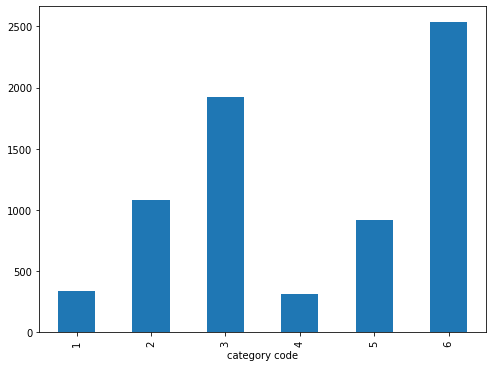

In [33]:
fig = plt.figure(figsize=(8,6))

df_clusters_extended.groupby('category code').caption.count().plot.bar(ylim=0)
plt.show()

# train model

In [ ]:
# https://stackabuse.com/text-classification-with-python-and-scikit-learn/

In [76]:
X, y = df_clusters_extended['caption'], df_clusters_extended['category code']

In [81]:
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()


for item in X:
    document = item
    
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(item))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)


In [82]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [90]:
# OR second way
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(documents).toarray()


In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Random Forest Classifier

In [92]:
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [93]:
y_pred = classifier.predict(X_test)

In [94]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 49   0   2   4   0   8]
 [  0 172   6   0  12  17]
 [  2   7 237   1   1 138]
 [  6   0   0  39   1   9]
 [  1  36   4   3 123  24]
 [  0   5  65   0   2 448]]
              precision    recall  f1-score   support

           1       0.84      0.78      0.81        63
           2       0.78      0.83      0.81       207
           3       0.75      0.61      0.68       386
           4       0.83      0.71      0.76        55
           5       0.88      0.64      0.75       191
           6       0.70      0.86      0.77       520

    accuracy                           0.75      1422
   macro avg       0.80      0.74      0.76      1422
weighted avg       0.76      0.75      0.75      1422

0.7510548523206751


# SVM

In [100]:
from sklearn import svm

classifier = svm.SVC(random_state=8)

In [101]:
# model fit
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [102]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[  0   0   0   0   0  63]
 [  0   0   0   0   0 207]
 [  0   0   0   0   0 386]
 [  0   0   0   0   0  55]
 [  0   0   0   0   0 191]
 [  0   0   0   0   0 520]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        63
           2       0.00      0.00      0.00       207
           3       0.00      0.00      0.00       386
           4       0.00      0.00      0.00        55
           5       0.00      0.00      0.00       191
           6       0.37      1.00      0.54       520

    accuracy                           0.37      1422
   macro avg       0.06      0.17      0.09      1422
weighted avg       0.13      0.37      0.20      1422

0.3656821378340366


# Naive

In [105]:
from sklearn import  naive_bayes

classifier = naive_bayes.MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [106]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 42   0   2   5   0  14]
 [  0 149   4   0  34  20]
 [  0   3 155   0   1 227]
 [ 10   0   3  26   0  16]
 [  0  57   3   0 101  30]
 [  0   0  88   0   0 432]]
              precision    recall  f1-score   support

           1       0.81      0.67      0.73        63
           2       0.71      0.72      0.72       207
           3       0.61      0.40      0.48       386
           4       0.84      0.47      0.60        55
           5       0.74      0.53      0.62       191
           6       0.58      0.83      0.69       520

    accuracy                           0.64      1422
   macro avg       0.72      0.60      0.64      1422
weighted avg       0.65      0.64      0.63      1422

0.6364275668073136


# KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [110]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 41   8   3   1   1   9]
 [  6 161  11   0  18  11]
 [ 11  37 225   0  15  98]
 [  3   8   5  33   2   4]
 [  9  35  18   1 114  14]
 [ 19  51  85   1  20 344]]
              precision    recall  f1-score   support

           1       0.46      0.65      0.54        63
           2       0.54      0.78      0.64       207
           3       0.65      0.58      0.61       386
           4       0.92      0.60      0.73        55
           5       0.67      0.60      0.63       191
           6       0.72      0.66      0.69       520

    accuracy                           0.65      1422
   macro avg       0.66      0.64      0.64      1422
weighted avg       0.66      0.65      0.65      1422

0.6455696202531646


# MultinomialNB

In [112]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [113]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 42   0   2   5   0  14]
 [  0 149   4   0  34  20]
 [  0   3 155   0   1 227]
 [ 10   0   3  26   0  16]
 [  0  57   3   0 101  30]
 [  0   0  88   0   0 432]]
              precision    recall  f1-score   support

           1       0.81      0.67      0.73        63
           2       0.71      0.72      0.72       207
           3       0.61      0.40      0.48       386
           4       0.84      0.47      0.60        55
           5       0.74      0.53      0.62       191
           6       0.58      0.83      0.69       520

    accuracy                           0.64      1422
   macro avg       0.72      0.60      0.64      1422
weighted avg       0.65      0.64      0.63      1422

0.6364275668073136


# Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 42   0   5   5   0  11]
 [  0 156   3   0  27  21]
 [  0   1 222   0   0 163]
 [  6   0   2  31   0  16]
 [  0  43   3   0 115  30]
 [  0   1  99   0   0 420]]
              precision    recall  f1-score   support

           1       0.88      0.67      0.76        63
           2       0.78      0.75      0.76       207
           3       0.66      0.58      0.62       386
           4       0.86      0.56      0.68        55
           5       0.81      0.60      0.69       191
           6       0.64      0.81      0.71       520

    accuracy                           0.69      1422
   macro avg       0.77      0.66      0.70      1422
weighted avg       0.71      0.69      0.69      1422

0.6933895921237694
